In [1]:
# %matplotlib notebook

In [25]:


# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import pprint as pprint
from scipy.stats import linregress

In [3]:
covid_df = pd.read_csv("US_covid_2.csv")
covid_df.head()

,Date,Country,New Cases,Cumulative cases,New deaths,Cumulative deaths
0,1/3/20,United States of America,0,0,0,0
1,1/4/20,United States of America,0,0,0,0
2,1/5/20,United States of America,0,0,0,0
3,1/6/20,United States of America,0,0,0,0
4,1/7/20,United States of America,0,0,0,0


In [4]:
# Split data pre/post vaccine
pre_vaccine_df = covid_df.iloc[:472,:]
post_vaccine_df = covid_df.iloc[472:,:]

In [5]:
pre_vaccine_df.tail()

,Date,Country,New Cases,Cumulative cases,New deaths,Cumulative deaths
467,4/14/21,United States of America,0,30829825,0,556505
468,4/15/21,United States of America,0,30829825,0,556505
469,4/16/21,United States of America,491639,31321464,5264,561769
470,4/17/21,United States of America,0,31321464,0,561769
471,4/18/21,United States of America,0,31321464,0,561769


In [6]:
post_vaccine_df.head()

,Date,Country,New Cases,Cumulative cases,New deaths,Cumulative deaths
472,4/19/21,United States of America,0,31321464,0,561769
473,4/20/21,United States of America,0,31321464,0,561769
474,4/21/21,United States of America,0,31321464,0,561769
475,4/22/21,United States of America,0,31321464,0,561769
476,4/23/21,United States of America,438557,31760021,4996,566765


In [7]:
#remove dates with 0 new cases

pre_vaccine_df = pre_vaccine_df.loc[(
   pre_vaccine_df["New Cases"] > 0)]
pre_vaccine_df.tail()

,Date,Country,New Cases,Cumulative cases,New deaths,Cumulative deaths
441,3/19/21,United States of America,380713,29525969,7500,535790
448,3/26/21,United States of America,401662,29927631,7272,543062
455,4/2/21,United States of America,446565,30374196,6335,549397
462,4/9/21,United States of America,455629,30829825,7108,556505
469,4/16/21,United States of America,491639,31321464,5264,561769


In [8]:
#remove dates with 0 new cases

post_vaccine_df = post_vaccine_df.loc[(
   post_vaccine_df["New Cases"] > 0)]
post_vaccine_df.head()

,Date,Country,New Cases,Cumulative cases,New deaths,Cumulative deaths
476,4/23/21,United States of America,438557,31760021,4996,566765
483,4/30/21,United States of America,363711,32123732,5014,571779
490,5/7/21,United States of America,321836,32445568,5035,576814
497,5/14/21,United States of America,251246,32696814,4293,581107
504,5/21/21,United States of America,206955,32903769,4005,585112


In [41]:
#remove outliers

post_vaccine_df = post_vaccine_df.loc[(
   post_vaccine_df["New Cases"] < 2000000)]
post_vaccine_df.head()

,Date,Country,New Cases,Cumulative cases,New deaths,Cumulative deaths
476,4/23/21,United States of America,438557,31760021,4996,566765
483,4/30/21,United States of America,363711,32123732,5014,571779
490,5/7/21,United States of America,321836,32445568,5035,576814
497,5/14/21,United States of America,251246,32696814,4293,581107
504,5/21/21,United States of America,206955,32903769,4005,585112


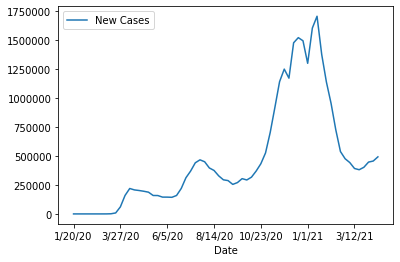

In [42]:
pre_vaccine_df.plot(kind='line', x = "Date", y= "New Cases")
plt.show()


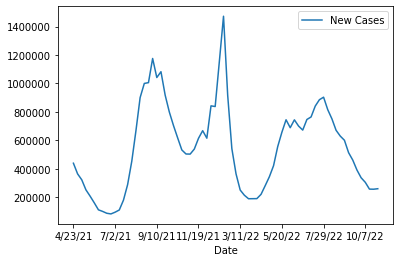

In [43]:
post_vaccine_df.plot(kind='line', x = "Date", y= "New Cases")
plt.show()

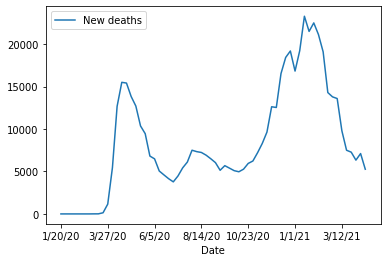

In [44]:
pre_vaccine_df.plot(kind='line', x = "Date", y= "New deaths")
plt.show()

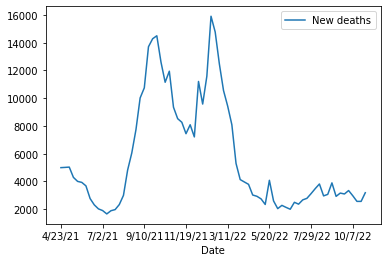

In [45]:
post_vaccine_df.plot(kind='line', x = "Date", y= "New deaths")
plt.show()

In [46]:
pre_vaccine_df.columns.values.tolist()

['Date',
 'Country',
 'New Cases',
 'Cumulative cases',
 'New deaths',
 'Cumulative deaths']

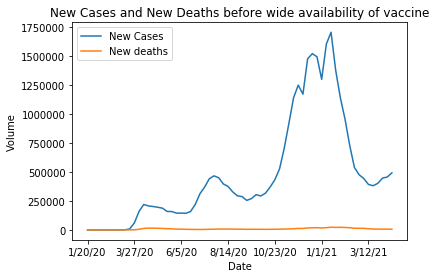

In [84]:
pre_vaccine_df.plot(x="Date", y=["New Cases", "New deaths"], kind="line")
plt.title('New Cases and New Deaths before wide availability of vaccine')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.savefig("Pre-Vaccine_cases_vs_deaths.png") 
plt.show()

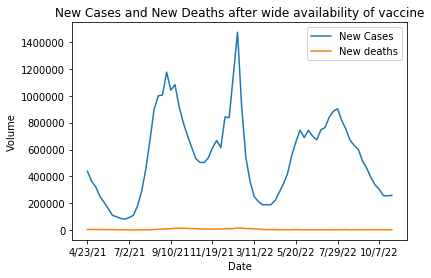

In [85]:
post_vaccine_df.plot(x="Date", y=["New Cases", "New deaths"], kind="line")
plt.title('New Cases and New Deaths after wide availability of vaccine')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.savefig("Post-Vaccine_cases_vs_deaths.png") 
plt.show()


The r-squared is: 0.6166203689997899


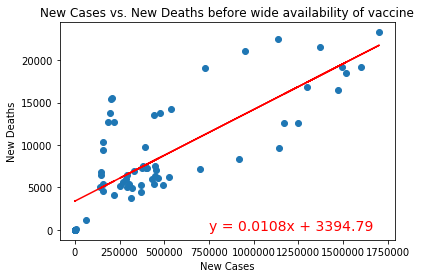

In [59]:
new_deaths = pre_vaccine_df.iloc[:,4]
new_cases = pre_vaccine_df.iloc[:,2]

(slope, intercept, rvalue, pvalue, stderr) = linregress(new_cases, new_deaths)
regress_values = new_cases * slope + intercept
line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,2))

plt.scatter(new_cases,new_deaths)

plt.plot(new_cases,regress_values,"r-")
plt.annotate(line_eq,(750000,10),fontsize=14,color="red")

plt.title('New Cases vs. New Deaths before wide availability of vaccine')
plt.xlabel('New Cases')
plt.ylabel('New Deaths')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Pre-Vaccine.png") 
plt.show()


The r-squared is: 0.26332442908093706


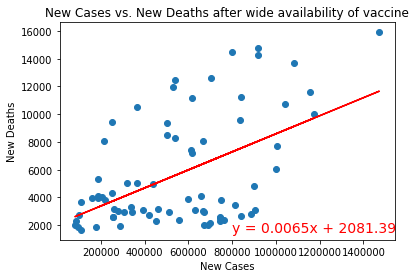

In [62]:
new_deaths = post_vaccine_df.iloc[:,4]
new_cases = post_vaccine_df.iloc[:,2]
(slope, intercept, rvalue, pvalue, stderr) = linregress(new_cases, new_deaths)
regress_values = new_cases * slope + intercept
line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,2))


plt.scatter(new_cases,new_deaths)
plt.plot(new_cases,regress_values,"r-")
plt.annotate(line_eq,(800000,1500),fontsize=14,color="red")

plt.title('New Cases vs. New Deaths after wide availability of vaccine')
plt.xlabel('New Cases')
plt.ylabel('New Deaths')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Post-Vaccine.png") 
plt.show()
